## Se cargan librerías: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.special import ndtri
import numpy as np

# import Nestle
import nestle
%matplotlib

Using matplotlib backend: Qt5Agg


In [15]:
def model1(z, a, b, c):
    return a*z**2+(-a+b)*z+c

def model2(z,a,c,w):
    return a*np.sin(w*z)+c

def truemodel(z):
    return -3.5*z**2+3.6*z-0.1

Se generan puntos dentro del intervalo $[0,10)$

In [4]:
#x = np.linspace(0, 10 , 100)  
x = np.arange(0,1,0.01)
x

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

Se genera ruido gaussiano:

In [5]:
#noise = np.random.normal(0.01, .01, size=40)
sigma = 0.05
noise = sigma*np.random.rand(len(x))
noise

array([0.02843425, 0.04615842, 0.02344268, 0.02684527, 0.04595816,
       0.03056681, 0.03305798, 0.04537131, 0.04028521, 0.02448478,
       0.04316113, 0.00767427, 0.02488018, 0.02639946, 0.00940149,
       0.03558215, 0.04063073, 0.01801062, 0.01939408, 0.02790221,
       0.01759974, 0.04950734, 0.04142182, 0.02395616, 0.04781019,
       0.03164912, 0.01146139, 0.01638645, 0.03392504, 0.0368156 ,
       0.03597648, 0.02421077, 0.04912984, 0.0187502 , 0.04432154,
       0.03248938, 0.01651279, 0.00115512, 0.02245927, 0.02607327,
       0.01647373, 0.03222119, 0.02358432, 0.01544178, 0.03418464,
       0.03223124, 0.0410266 , 0.03722893, 0.02687566, 0.03431183,
       0.01284291, 0.03309821, 0.0343081 , 0.02643433, 0.02345985,
       0.01073512, 0.02350508, 0.02053087, 0.02948751, 0.04946508,
       0.02950992, 0.02214939, 0.02268398, 0.01057153, 0.00790782,
       0.0145388 , 0.03410148, 0.01878183, 0.01442669, 0.02677343,
       0.0120281 , 0.02881858, 0.0306816 , 0.03524624, 0.03489

A la variable $y$ se le asigna la función line más el ruido gaussiano. 

In [6]:
y = truemodel(x)+noise
y

array([-0.07156575, -0.01819158, -0.00595732,  0.03169527,  0.08435816,
        0.10181681,  0.13645798,  0.18022131,  0.20588521,  0.22013478,
        0.26816113,  0.26132427,  0.30648018,  0.33524946,  0.34480149,
        0.39683215,  0.42703073,  0.42886062,  0.45399408,  0.48555221,
        0.49759974,  0.55115734,  0.56402182,  0.56680616,  0.61021019,
        0.61289912,  0.61086139,  0.63323645,  0.66752504,  0.6864656 ,
        0.70097648,  0.70386077,  0.74272984,  0.7256002 ,  0.76372154,
        0.76373938,  0.75891279,  0.75400512,  0.78505927,  0.79772327,
        0.79647373,  0.81987119,  0.81818432,  0.81629178,  0.84058464,
        0.84348124,  0.8564266 ,  0.85607893,  0.84847566,  0.85796183,
        0.83784291,  0.85874821,  0.8599081 ,  0.85128433,  0.84685985,
        0.83198512,  0.84190508,  0.83538087,  0.84008751,  0.85511508,
        0.82950992,  0.81579939,  0.80928398,  0.78942153,  0.77830782,
        0.7757888 ,  0.78550148,  0.75963183,  0.74402669,  0.74

Se juntan en un solo numpy array los valores de x,y.

In [7]:
text = np.empty(len(x)*2)
text = np.reshape(text,(len(x),2))
for i in range(len(x)):
    text[i,:]= x[i],y[i]
np.shape(text)
text

array([[ 0.        , -0.07156575],
       [ 0.01      , -0.01819158],
       [ 0.02      , -0.00595732],
       [ 0.03      ,  0.03169527],
       [ 0.04      ,  0.08435816],
       [ 0.05      ,  0.10181681],
       [ 0.06      ,  0.13645798],
       [ 0.07      ,  0.18022131],
       [ 0.08      ,  0.20588521],
       [ 0.09      ,  0.22013478],
       [ 0.1       ,  0.26816113],
       [ 0.11      ,  0.26132427],
       [ 0.12      ,  0.30648018],
       [ 0.13      ,  0.33524946],
       [ 0.14      ,  0.34480149],
       [ 0.15      ,  0.39683215],
       [ 0.16      ,  0.42703073],
       [ 0.17      ,  0.42886062],
       [ 0.18      ,  0.45399408],
       [ 0.19      ,  0.48555221],
       [ 0.2       ,  0.49759974],
       [ 0.21      ,  0.55115734],
       [ 0.22      ,  0.56402182],
       [ 0.23      ,  0.56680616],
       [ 0.24      ,  0.61021019],
       [ 0.25      ,  0.61289912],
       [ 0.26      ,  0.61086139],
       [ 0.27      ,  0.63323645],
       [ 0.28      ,

Se guardan archivos de texto tanto para los datos generados (x,y), como los errores:

In [8]:
np.savetxt('poliModeldata.txt',text)
np.savetxt('noisepoliModeldata.txt',noise)

Creando un txt con la matriz de covarianza creada a partir del ruido en txt.

In [9]:
errors = np.loadtxt('noisepoliModeldata.txt')
errorsdiag = np.diag(errors**2)
cov = errorsdiag
np.savetxt("cov_poliModeldata.txt",errorsdiag)

Se cargan los datos (x,y) y la matriz de covarianza:

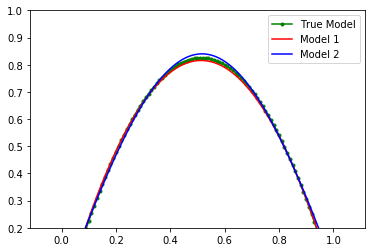

In [26]:
plt.axis("equal")
#plt.scatter(x,y, color='green', marker='o', label="Data") 
y0 = truemodel(x)
plt.plot(x,y0, color='green', marker = '.', label = "True Model")
y1 = model1(x,-3.4, 0.09,-0.08)
plt.plot(x,y1, color="red", label="Model 1")
y2 = model2(x, 0.87, -0.03, 3.04)
plt.plot(x,y2, color="blue", label="Model 2")
#plt.plot(x, [line(i,2.001040,4.329550) for i in x], color = 'red')
#plt.figure(figsize=(11,10))
plt.xlim(0,1)
plt.ylim(0.2,1)
plt.legend(bbox_to_anchor=(1., 1))

plt.savefig("modelcomparisonplot.png")

In [15]:
len(x)

100

Se juntan en un solo numpy array los valores de x,y.

In [9]:
text = np.empty(len(x)*2)
text = np.reshape(text,(len(x),2))
for i in range(len(x)):
    text[i,:]= x[i],y[i]
np.shape(text)
text

array([[ 0.        , -0.06327531],
       [ 0.01      , -0.05040689],
       [ 0.02      ,  0.01958262],
       [ 0.03      ,  0.05313716],
       [ 0.04      ,  0.04259564],
       [ 0.05      ,  0.08211545],
       [ 0.06      ,  0.11703757],
       [ 0.07      ,  0.17136363],
       [ 0.08      ,  0.19868102],
       [ 0.09      ,  0.2109212 ],
       [ 0.1       ,  0.23933752],
       [ 0.11      ,  0.28481318],
       [ 0.12      ,  0.29996034],
       [ 0.13      ,  0.32528467],
       [ 0.14      ,  0.36249622],
       [ 0.15      ,  0.37028252],
       [ 0.16      ,  0.38776055],
       [ 0.17      ,  0.44215271],
       [ 0.18      ,  0.44285526],
       [ 0.19      ,  0.49984219],
       [ 0.2       ,  0.4974739 ],
       [ 0.21      ,  0.53134892],
       [ 0.22      ,  0.53972799],
       [ 0.23      ,  0.56734704],
       [ 0.24      ,  0.56934631],
       [ 0.25      ,  0.60083723],
       [ 0.26      ,  0.6017161 ],
       [ 0.27      ,  0.65756778],
       [ 0.28      ,

Se guardan archivos de texto tanto para los datos generados (x,y), como los errores:

In [10]:
np.savetxt('toydata.txt',text)
np.savetxt('noisetoydata.txt',noise)

Creando un txt con la matriz de covarianza creada a partir del ruido en txt.

In [11]:
errors = np.loadtxt('noisetoydata.txt')
errorsdiag = np.diag(errors**2)
cov = errorsdiag
np.savetxt("cov_toy.txt",errorsdiag)

Se cargan los datos (x,y) y la matriz de covarianza:

In [21]:
data=np.loadtxt('toydata.txt')
x=data[:,0]
y=data[:,1]
cov=np.loadtxt('cov_toy.txt',skiprows=0)

Ajustando recta

In [12]:
LN2PI = np.log(2.*np.pi)
#LNSIGMA = np.log(sigma)
M=len(x)


Escribiendo Priors planos:

In [14]:
def prior_transform(theta):
    
    for parameter in theta:
        
        mprime, cprime = theta # unpack the parameters (in their unit hypercube form)

        cmin = 0.  # lower bound on uniform prior on c
        cmax = 1.   # upper bound on uniform prior on c

        mmin = 0.  # lower bound on uniform prior on c
        mmax = 1.   # upper bound on uniform prior on c

        m = mprime*(mmax-mmin) + mmin 
        c = cprime*(cmax-cmin) + cmin  # convert back to c

    return (m, c)



Definiendo un likelihood similar a SuperMC:

In [15]:
import scipy.linalg as la
from scipy import dot
icov = la.inv(cov)
#icov = errorsdiag
def loglikelihood_nestle(theta):

    m, c = theta # unpack the parameters

    # normalisation
    #norm = -0.5*M*LN2PI - M*LNSIGMA
    #norm = -np.log(la.det(errorsdiag))*0.5-0.5*len(x)*np.log(np.pi)

    norm = -np.log(la.det(cov))*0.5-0.5*len(x)*np.log(np.pi)
    #chisq = np.sum(((y-line(x, m, c))/sigma)**2)
    delta = y - line(x,m,c)
    chisq = dot(delta,dot(icov,delta))

    #return norm - 0.5*chisq
    return  norm -0.5*chisq



Corriendo multinest:

In [16]:
#nlive = 1024     # number of live points
nlive = 40
method = 'multi' # use MutliNest algorithm
ndims = 2        # two parameters
tol= 0.5         # the stopping criterion (this is the nestle default, so doesn't need to be set)

res = nestle.sample(loglikelihood_nestle, prior_transform, ndims, 
                    method=method, npoints=nlive, dlogz=tol,  callback=nestle.print_progress)

res.summary()

/home/isidro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


NameError: name 'line' is not defined

In [16]:
logZnestle = res.logz                         # value of logZ
infogainnestle = res.h                        # value of the information gain in nats
logZerrnestle = np.sqrt(infogainnestle/nlive) # estimate of the statistcal uncertainty on logZ

# output marginal likelihood
print('Marginalised evidence is {} ± {}'.format(logZnestle, logZerrnestle))



Marginalised evidence is 43.1917050947816 ± 0.6054941768465844


Number of posterior samples is 96


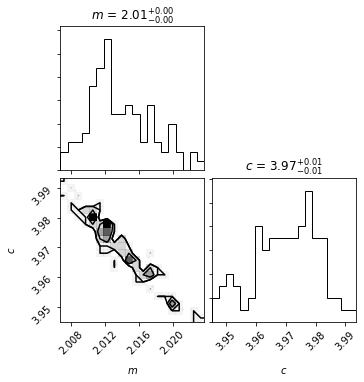

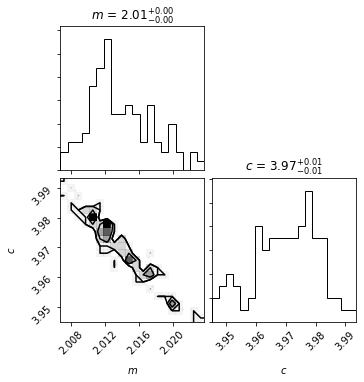

In [17]:
# re-scale weights to have a maximum of one
nweights = res.weights/np.max(res.weights)

# get the probability of keeping a sample from the weights
keepidx = np.where(np.random.rand(len(nweights)) < nweights)[0]

# get the posterior samples
postsamples = res.samples[keepidx,:]
#postsamples = res.samples

print('Number of posterior samples is {}'.format(postsamples.shape[0]))

# plot posterior samples (if corner.py is installed)
try:
    import matplotlib as mpl
    mpl.use("Agg") # force Matplotlib backend to Agg
    import corner # import corner.py
except ImportError:
    sys.exit(1)

corner.corner(postsamples, labels=[r"$m$", r"$c$"], truths=[2, 4], show_titles=True)
#fig.savefig('Nestle.png')

## Probando EMCEE

In [21]:
import emcee

In [37]:
def logposterior(theta, data, sigma, x):
    """
    The natural logarithm of the joint posterior.
    
    Args:
        theta (tuple): a sample containing individual parameter values
        data (list): the set of data/observations
        sigma (float): the standard deviation of the data points
        x (list): the abscissa values at which the data/model is defined
    """
    
    lp = logprior(theta) # get the prior
    
    # if the prior is not finite return a probability of zero (log probability of -inf)
    if not np.isfinite(lp):
        return -np.inf
    
    # return the likeihood times the prior (log likelihood plus the log prior)
    #return lp + loglikelihood(theta, data, sigma, x)
    return lp + loglikelihood

In [44]:
def loglikelihood(theta, data, sigma, x):
    """
    The natural logarithm of the joint likelihood.
    
    Args:
        theta (tuple): a sample containing individual parameter values
        data (list): the set of data/observations
        sigma (float): the standard deviation of the data points
        x (list): the abscissa values at which the data/model is defined
    
    Note:
        We do not include the normalisation constants (as discussed above).
    """
    
    # unpack the model parameters from the tuple
    m, c = theta
    
    # evaluate the model (assumes that the straight_line model is defined as above)
    md = line(x, m, c)
    
    # return the log likelihood
    #return -0.5*np.sum(((md - data)/sigma)**2)
    return -0.5*np.sum(((md - y)/sigma)**2)

In [45]:
def logprior(theta):
    """
    The natural logarithm of the prior probability.
    
    Args:
        theta (tuple): a sample containing individual parameter values
    
    Note:
        We can ignore the normalisations of the prior here.
    """
    
    lp = 0.
    
    # unpack the model parameters from the tuple
    m, c = theta
    
    # uniform prior on c
    cmin = -10. # lower range of prior
    cmax = 10.  # upper range of prior
    
    # set prior to 1 (log prior to 0) if in the range and zero (-inf) outside the range 
    lp = 0. if cmin < c < cmax else -np.inf
    
    # Gaussian prior on m
    mmu = 0.     # mean of the Gaussian prior
    msigma = 10. # standard deviation of the Gaussian prior
    lp -= 0.5*((m - mmu)/msigma)**2
    
    return lp

In [48]:
Nens = 100   # Nens number of ensemble points

mmu = 0.     # mean of the Gaussian prior
msigma = 10. # standard deviation of the Gaussian prior

mini = np.random.normal(mmu, msigma, Nens) # initial m points

cmin = -10.  # lower range of prior
cmax = 10.   # upper range of prior

cini = np.random.uniform(cmin, cmax, Nens) # initial c points

inisamples = np.array([mini, cini]).T # initial samples

ndims = inisamples.shape[1] # number of parameters/dimensions

Nburnin = 500   # number of burn-in samples
Nsamples = 500  # number of final posterior samples

# set additional args for the posterior (the data, the noise std. dev., and the abscissa)
argslist = (data, sigma, x)

# set up the sampler
sampler = emcee.EnsembleSampler(Nens, ndims, logposterior, args=argslist)

# pass the initial samples and total number of samples required
sampler.run_mcmc(inisamples, Nsamples+Nburnin);

emcee: Exception while calling your likelihood function:
  params: [-2.477107    4.79880382]
  args: (array([[ 0.        ,  4.04138186],
       [ 0.1       ,  4.3385335 ],
       [ 0.2       ,  4.72267524],
       [ 0.3       ,  4.92039846],
       [ 0.4       ,  4.92471793],
       [ 0.5       ,  5.22499116],
       [ 0.6       ,  5.45925973],
       [ 0.7       ,  5.87371288],
       [ 0.8       ,  5.92713367],
       [ 0.9       ,  6.20766903],
       [ 1.        ,  6.31623752],
       [ 1.1       ,  6.63189406],
       [ 1.2       ,  6.88187894],
       [ 1.3       ,  6.66500737],
       [ 1.4       ,  7.2943981 ],
       [ 1.5       ,  7.19966283],
       [ 1.6       ,  7.34065015],
       [ 1.7       ,  7.69895617],
       [ 1.8       ,  7.75336568],
       [ 1.9       ,  7.89611533],
       [ 2.        ,  8.14924207],
       [ 2.1       ,  8.5452953 ],
       [ 2.2       ,  8.84084   ],
       [ 2.3       ,  9.03417722],
       [ 2.4       ,  9.11605922],
       [ 2.5       ,  9

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-37-217388530f17>", line 20, in logposterior
    return lp + loglikelihood
TypeError: unsupported operand type(s) for +: 'float' and 'function'


TypeError: unsupported operand type(s) for +: 'float' and 'function'